In [86]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product
import missingno

# Preprocessing Data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Modeling
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Handling Warning
import warnings
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv('CC GENERAL.csv')

# We convert name of feature to lower font
df.columns = map(str.lower, df.columns)
df.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [88]:
df_wo_id = df.drop('cust_id', axis=1)

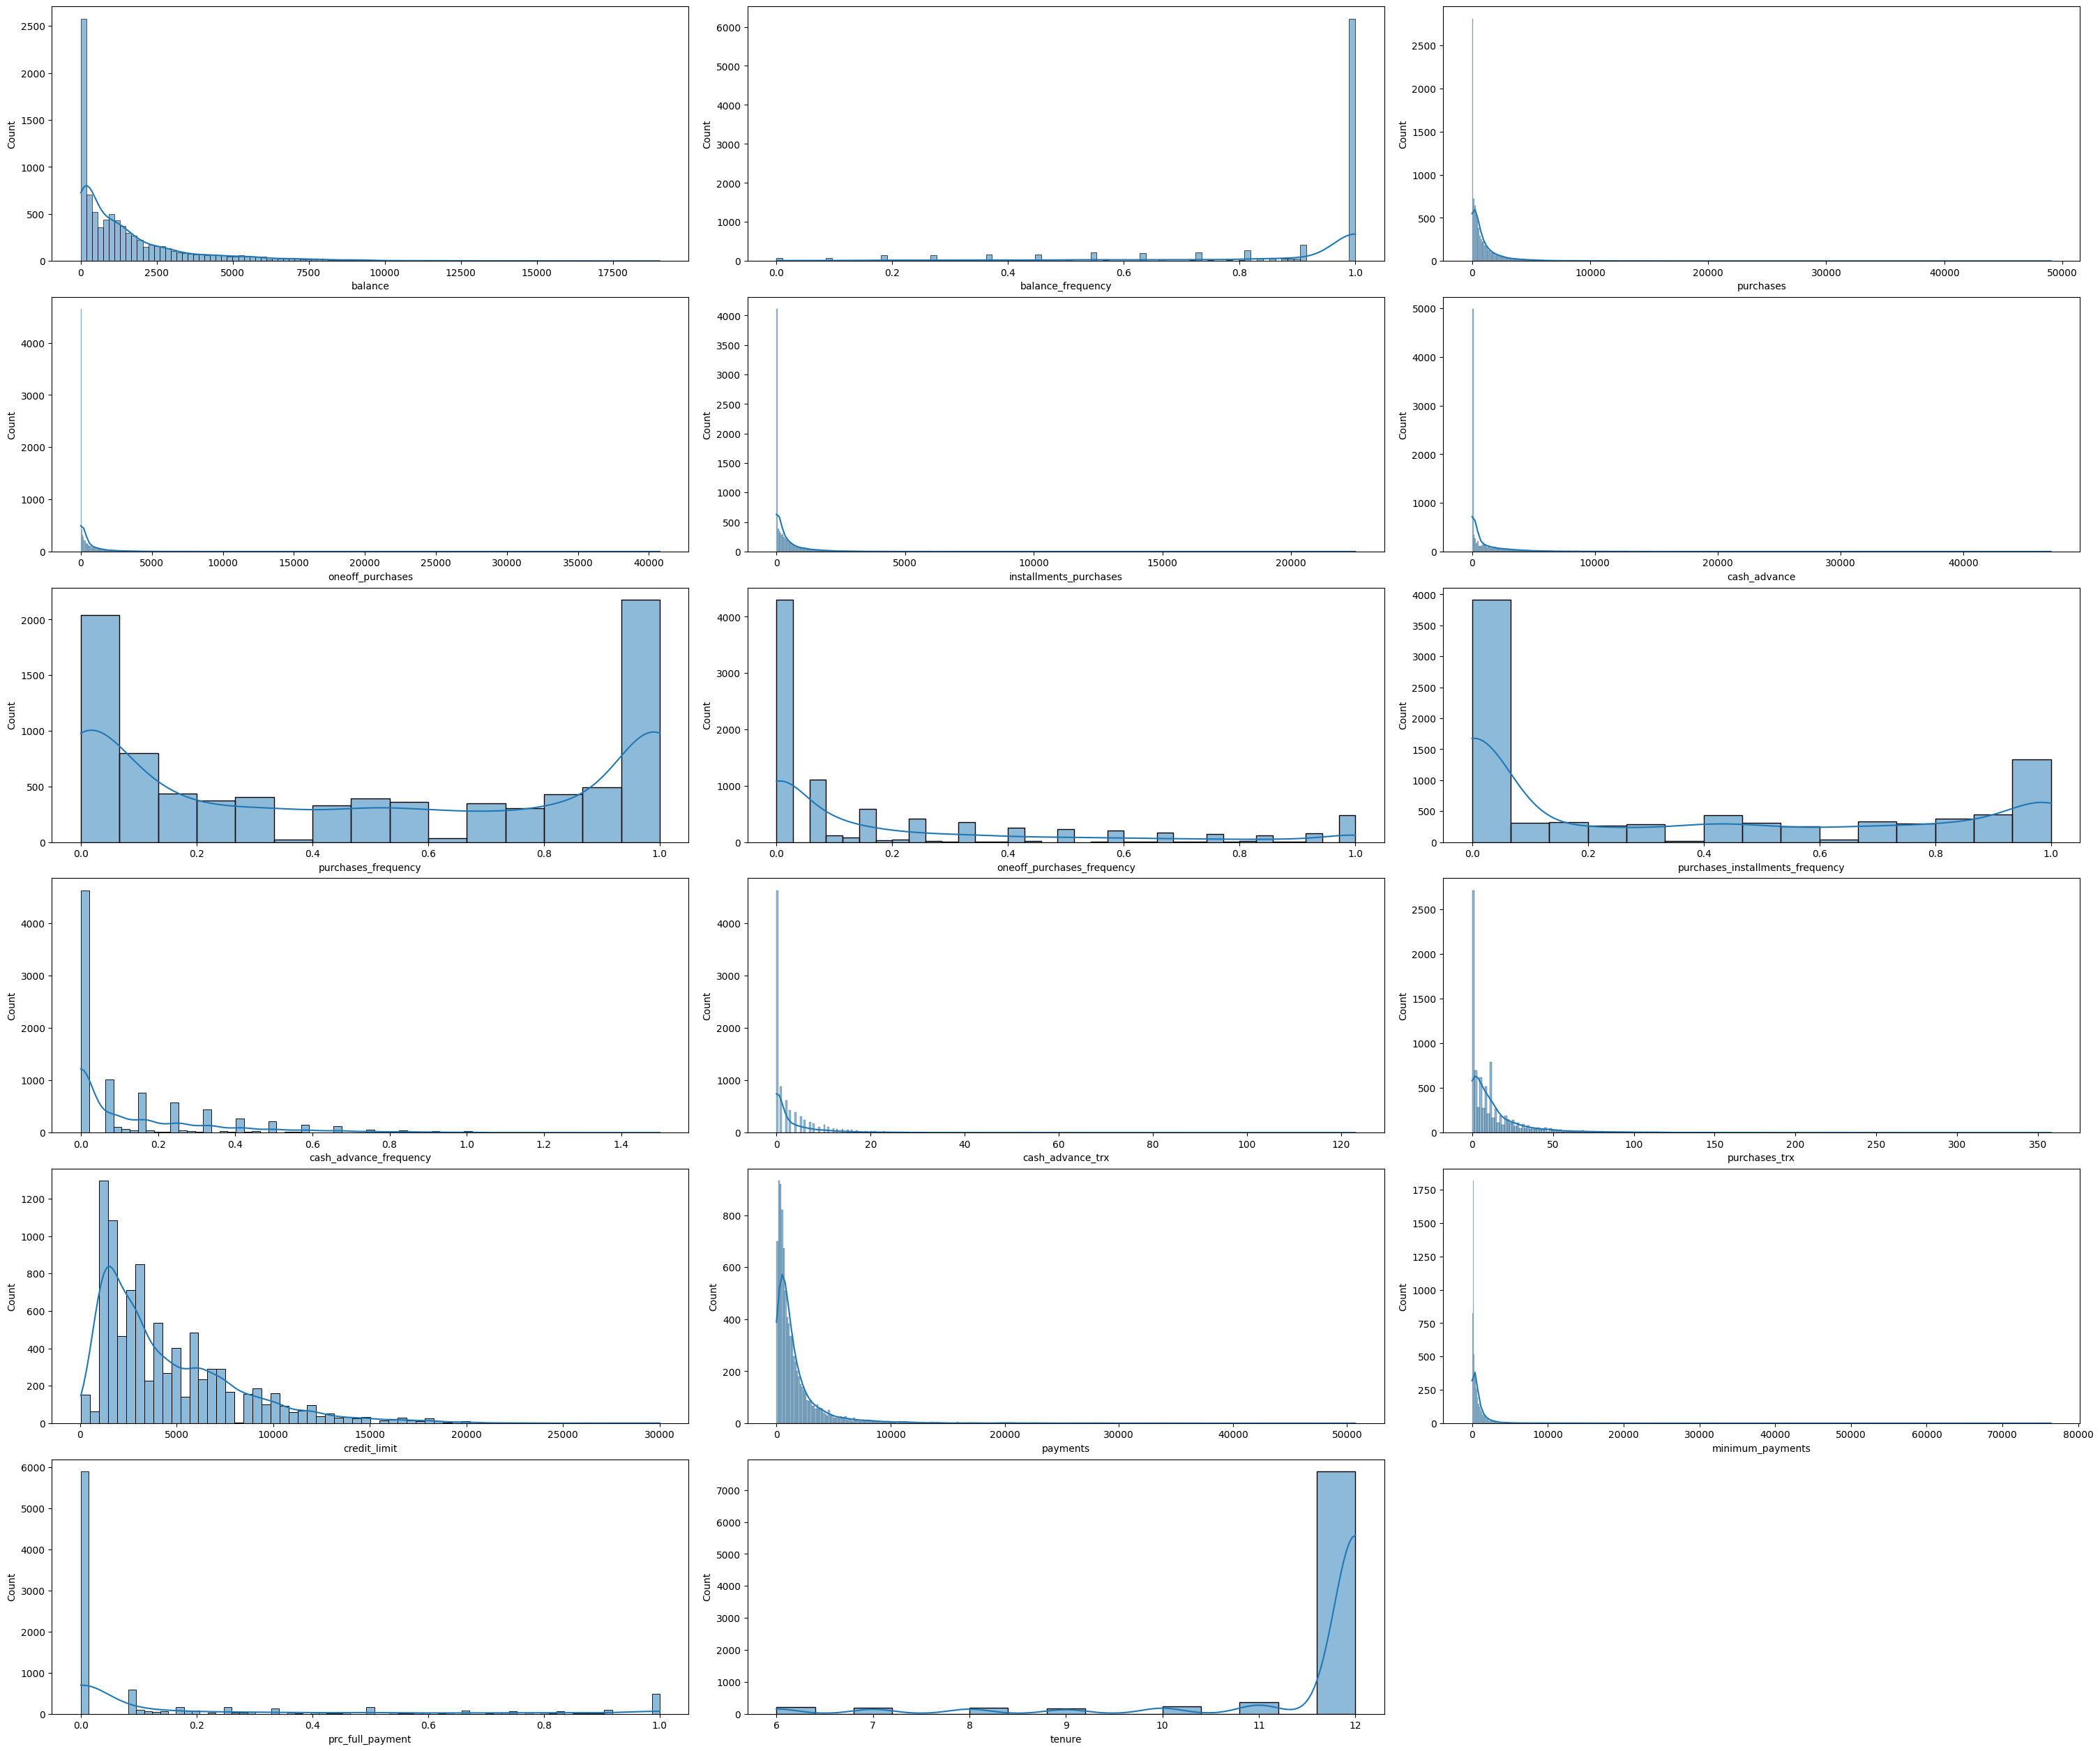

In [89]:
fig = plt.figure(figsize=(30, 25), constrained_layout=True)
for i in range(len(df_wo_id.columns)):
    plt.subplot(6, 3, i+1)
    sns.histplot(df_wo_id[df_wo_id.columns[i]], kde=True)

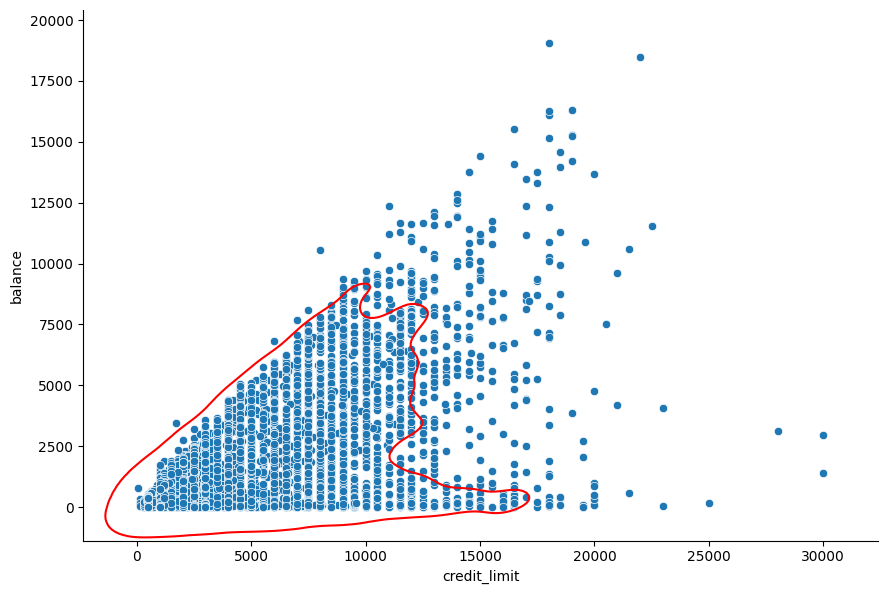

In [90]:
sns.pairplot(data=df_wo_id, x_vars='credit_limit', y_vars='balance', 
             height=6, aspect=1.5).map(sns.kdeplot, levels=1, color='red');

In [ ]:
sns.pairplot(data=df_wo_id, 
             y_vars=['balance', 'credit_limit'], 
             x_vars=['purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance'],
            height=6, aspect=1.4).map(sns.kdeplot, levels=1, color='red')

In [ ]:
print(len(df_wo_id[df_wo_id['purchases_installments_frequency'] > .5]), 'purchases_installments_frequency')
print(len(df_wo_id[df_wo_id['oneoff_purchases_frequency'] > .5]), 'oneoff')

In [ ]:
plt.figure(figsize=(7,7))
plt.pie([len(df_wo_id[df_wo_id['purchases_installments_frequency'] > .5]),
         len(df_wo_id[df_wo_id['oneoff_purchases_frequency'] > .5])], 
        labels = ['purchases_installments_frequency', 
                  'oneoff_purchases_frequency'], 
        autopct='%.0f%%')
plt.title('purchases_installments_frequency VS oneoff_purchases_frequency (>0.5)');


In [ ]:
sns.pairplot(data=df_wo_id, y_vars='payments', x_vars='minimum_payments', 
             height=6, aspect=1.4).map(sns.kdeplot, levels=1, color='red');


In [ ]:
plt.figure(figsize=(18, 14))
columns=['purchases','oneoff_purchases','installments_purchases','cash_advance','credit_limit','payments']
n=1
for x in columns:
    plt.subplot(2,3,n)
    plt.scatter(df_wo_id['balance'], df_wo_id[x], alpha=0.25)
    plt.xlabel('Balance')
    plt.ylabel(x)
    n=n+1
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [ ]:
plt.figure(figsize=(18, 14))
columns=['oneoff_purchases','installments_purchases','cash_advance','payments']
n=1
for x in columns:
    plt.subplot(2,2,n)
    plt.scatter(df_wo_id['credit_limit'], df_wo_id[x], alpha=0.25)
    plt.xlabel('Credit Limit')
    plt.ylabel(x)
    n=n+1
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [ ]:
correlation = df_wo_id.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(20, 20)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlation, cmap=cmap, mask=mask, square=True, linewidths=.5, 
            annot=True, annot_kws={'size':14})

# displays the plot
plt.show()

In [ ]:
df_wo_id.info()

In [ ]:
listItem = []
for col in df_wo_id.columns :
    listItem.append([col, df_wo_id[col].dtype, df_wo_id[col].isna().sum(), round((df_wo_id[col].isna().sum()/len(df_wo_id[col])) * 100,2),
                    df_wo_id[col].nunique(), list(df_wo_id[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'missing value', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

In [ ]:
hist_b_ho = df_wo_id.hist(bins=50,figsize=(30,20))
hist_b_ho
plt.show()

In [ ]:

plt.figure(figsize=(25,20))
for i in range(len(df_wo_id.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df_wo_id[df_wo_id.columns[i]])
    plt.title(df_wo_id.columns[i])
    
plt.tight_layout()

In [ ]:
def find_outlier(df, feature):
    print('Outlier ' + feature)
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    Lower_Limit = q1 - limit
    Upper_Limit = q3 + limit
    print(f'Lower_Limit: {Lower_Limit}')
    print(f'Upper_Limit: {Upper_Limit}')
    print('_________________________')

In [ ]:
for i in df_wo_id :
    find_outlier(df_wo_id, i)

In [ ]:
out1 = df_wo_id[df_wo_id['balance'] > 4942.9272155]
out2 = df_wo_id[(df_wo_id['balance_frequency'] < 0.7222225000000001) & (df['balance_frequency'] > 1.1666664999999998)]
out3 = df_wo_id[df_wo_id['purchases'] > 2715.8725000000004]
out4 = df_wo_id[df_wo_id['oneoff_purchases'] > 1443.5124999999998]
out5 = df_wo_id[df_wo_id['installments_purchases'] > 1171.59375]
out6 = df_wo_id[df_wo_id['cash_advance'] > 2784.5528481250003]
out7 = df_wo_id[df_wo_id['purchases_frequency'] > 2.166668]
out8 = df_wo_id[df_wo_id['oneoff_purchases_frequency'] > 0.75]
out9 = df_wo_id[df_wo_id['purchases_installments_frequency'] > 1.875]
out10 = df_wo_id[df_wo_id['cash_advance_frequency'] > 0.555555]
out11 = df_wo_id[df_wo_id['cash_advance_trx'] > 10.0]
out12 = df_wo_id[df_wo_id['purchases_trx'] > 41.0]
out13 = df_wo_id[df_wo_id['credit_limit'] > 13850.0]
out14 = df_wo_id[df_wo_id['payments'] > 4177.921542875]
out15 = df_wo_id[df_wo_id['minimum_payments'] > 1810.0280870000001]
out16 = df_wo_id[df_wo_id['prc_full_payment'] > 0.35714250000000003]
out17 = df_wo_id[(df_wo_id['tenure'] != 12.0)]

In [ ]:
out_all = pd.concat([out1, out2, out3, out4, out5, out6, out7, out8, out9, out10, out11, out12, out13, out14, out15, out16, out17], axis = 0)
out_all.drop_duplicates(inplace=True)
out_all

In [ ]:
print('Percentage Outlier')
len(out_all)/len(df)*100

In [ ]:
df_wo_id[df_wo_id['balance'] > df_wo_id['credit_limit']]

In [ ]:
df_wo_id[df_wo_id['minimum_payments'] > df_wo_id['payments']]

In [ ]:
df_wo_id[df_wo_id['installments_purchases'] > df_wo_id['credit_limit']]

In [ ]:
# Anomaly 4
df_wo_id[df_wo_id['cash_advance_frequency'] > 1]

In [ ]:
cash_advance_freq_more_than_1 = df_wo_id[df_wo_id['cash_advance_frequency'] > 1].index
df_wo_id['cash_advance_frequency'].iloc[cash_advance_freq_more_than_1] = 1

#check whether there is still cash_advance_frequency above 1
df_wo_id[df_wo_id['cash_advance_frequency'] > 1].cash_advance_frequency.any

In [ ]:
df_wo_id[df_wo_id.duplicated()]

In [ ]:
df_wo_id.isna().sum()

In [ ]:
missingno.bar(df_wo_id,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
feat_cols = [col for col in df_wo_id.columns]

itr_imputer = IterativeImputer(initial_strategy='median', 
                               min_value=0, random_state=2022)

df[feat_cols] = itr_imputer.fit_transform(df[feat_cols])

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns)


In [ ]:
df.info()

In [ ]:
df_model = df.copy()

In [ ]:
df_model.drop(['cust_id', 'balance', 'purchases', 
           'cash_advance', 'cash_advance_trx', 
           'purchases_trx', 'credit_limit', 
           'payments', 'minimum_payments', 'tenure'], 
          axis=1, inplace=True, errors='ignore')
df_model.columns

In [ ]:
oneoff_proportion = df_wo_id['oneoff_purchases'] / df_wo_id['purchases']

# change installments_purchase to installments_proportion
installments_proportion = df_wo_id['installments_purchases'] / df_wo_id['purchases']


In [ ]:
df_model.rename(columns={'oneoff_purchases_frequency': 'oneoff_frequency',
                     'purchases_installments_frequency': 'installments_frequency',
                     'prc_full_payment': 'payments_proportion'},
            inplace=True, errors='ignore')
df_model.columns

In [ ]:
df_model.head().T

In [ ]:
def summary_stats(df_model, n=4):
    # central tendency: mean, median
    mean = pd.DataFrame(df_model.apply(np.mean)).T
    median = pd.DataFrame(df_model.apply(np.median)).T

    # distribution: ,std, min, max, range, skew, kurtosis
    std = pd.DataFrame(df_model.apply(np.std)).T
    min_value = pd.DataFrame(df_model.apply(min)).T
    max_value = pd.DataFrame(df_model.apply(max)).T
    range_value = pd.DataFrame(df_model.apply(lambda x: x.max() - x.min())).T
    skewness = pd.DataFrame(df_model.apply(lambda x: x.skew())).T
    kurtosis = pd.DataFrame(df_model.apply(lambda x: x.kurtosis())).T

    # concatenates
    summary_stats = pd.concat([min_value, max_value, range_value, mean, median, std, skewness, kurtosis]).T.reset_index()
    summary_stats.columns = ['attributes','min','max', 'range','mean','median', 'std','skewness','kurtosis']
    
    return round(summary_stats, n)

In [ ]:
summary_stats(df_model)

In [ ]:
def proportion_anomalies():
    nan_oneoff_proportion = np.isnan(oneoff_proportion).sum()
    nan_installments_proportion = np.isnan(installments_proportion).sum()
    inf_oneoff_proportion = np.isinf(oneoff_proportion).sum()
    inf_installments_proportion = np.isinf(installments_proportion).sum()
    more_than_1_oneoff_proportion = len(oneoff_proportion[oneoff_proportion > 1])
    more_than_1_installments_proportion = len(installments_proportion[installments_proportion > 1])

    proportion_anomalies = pd.DataFrame({'nan': [nan_oneoff_proportion, nan_installments_proportion],
                                        'inf': [inf_oneoff_proportion, inf_installments_proportion],
                                        'more_than_1': [more_than_1_oneoff_proportion, more_than_1_installments_proportion]},
                                        index=['oneoff_proportion', 'installments_proportion'])

    return proportion_anomalies

In [ ]:
proportion_anomalies()

In [ ]:
df_wo_id[np.isnan(installments_proportion)].loc[:, ['purchases', 'installments_purchases']].value_counts()


In [ ]:
oneoff_proportion.fillna(0, inplace=True)
installments_proportion.fillna(0, inplace=True)

# check anomalies
proportion_anomalies()

In [ ]:
df_wo_id.iloc[installments_proportion[installments_proportion == np.inf].index].iloc[:,2:5]


In [ ]:
inf_to_1 = installments_proportion[installments_proportion == np.inf].index
installments_proportion.iloc[inf_to_1] = 1

proportion_anomalies()

In [ ]:
oneoff_more_than_1 = oneoff_proportion[oneoff_proportion > 1].index
oneoff_proportion.iloc[oneoff_more_than_1] = 1

installments_more_than_1 = installments_proportion[installments_proportion > 1].index
installments_proportion.iloc[installments_more_than_1] = 1

proportion_anomalies()

In [ ]:
df_model.oneoff_purchases = oneoff_proportion
df_model.installments_purchases = installments_proportion

In [ ]:
df_model.rename(columns={'oneoff_purchases': 'oneoff_proportion',
                     'installments_purchases': 'installments_proportion'},
            inplace=True)
df_model.head()

In [ ]:
summary_stats(df_model)

In [ ]:
number_of_cluster = np.arange(2,11) # Number of Clusters
np.random.seed(2022)

In [ ]:
pca_all = PCA(n_components=len(df_model.columns), random_state = 2022)
pca_all.fit(df_model)
variance = pca_all.explained_variance_ratio_
var = np.cumsum(variance)*100

#plot for information extracted
fig = px.line(x=np.arange(len(df_model.columns))+1, y=var, markers=True)
fig.update_xaxes(title_text='# of Features')
fig.update_yaxes(title_text='% Variance Explained')
fig.update_layout(width=900)

In [ ]:
print('information extracted {} %'.format(np.sum(variance[:2])*100/np.sum(variance)))


In [ ]:
pca_n = PCA(n_components = 2, random_state = 2022) 
X_principal = pca_n.fit_transform(df_model)
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

summary_stats(X_principal)

In [ ]:
fig = go.Figure(go.Scatter(
    x=X_principal['P1'], y=X_principal['P2'], mode='markers'))
fig.update_xaxes(title_text='P2')
fig.update_yaxes(title_text='P1')
fig.update_layout(height=700, width=700,
                  title_text='Principal Component Analysis')

In [ ]:
ward_s_scores = []
ward_db_scores = []
ward_calinski_scores = []
average_s_scores = []
average_db_scores = []
average_calinski_scores = []
complete_s_scores = []
complete_db_scores = []
complete_calinski_scores = []

agglo_metrics = {'ward': [ward_s_scores, ward_db_scores, ward_calinski_scores, 'rgb(128,177,211)'],
                 'average': [average_s_scores, average_db_scores, average_calinski_scores, 'rgb(141,211,199)'],
                 'complete': [complete_s_scores, complete_db_scores, complete_calinski_scores, 'rgb(251,128,114)']}

for i, j in product(agglo_metrics, number_of_cluster):
    agglo = AgglomerativeClustering(linkage=i, n_clusters=j)
    agglo.fit(X_principal)
    agglo_metrics[i][0].append(silhouette_score(
        X_principal, agglo.labels_))
    agglo_metrics[i][1].append(davies_bouldin_score(
        X_principal, agglo.labels_))
    agglo_metrics[i][2].append(calinski_harabasz_score(
        X_principal, agglo.labels_))

In [ ]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)

for i in agglo_metrics:
    for j, k in zip(range(1, 4), ['Silhouette', 'Davies Bouldin', 'Calinski-Harabasz']):
        fig.append_trace(go.Scatter(x=list(number_of_cluster), y=agglo_metrics[i][j-1], name=i.title(),
                                    legendgroup=i, line_color=agglo_metrics[i][-1],
                                    showlegend=False if j != 1 else True), row=j, col=1)
        fig.update_yaxes(title_text=k, row=j, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  legend_title_text='Metrics',
                  title_text='Agglomerative Clustering Metric Scores')

In [ ]:
ward_s_scores = []
ward_db_scores = []
ward_calinski_scores = []
average_s_scores = []
average_db_scores = []
average_calinski_scores = []
complete_s_scores = []
complete_db_scores = []
complete_calinski_scores = []

agglo_metrics = {'ward': [ward_s_scores, ward_db_scores, ward_calinski_scores, 'rgb(128,177,211)'],
                 'average': [average_s_scores, average_db_scores, average_calinski_scores, 'rgb(141,211,199)'],
                 'complete': [complete_s_scores, complete_db_scores, complete_calinski_scores, 'rgb(251,128,114)']}

for i, j in product(agglo_metrics, number_of_cluster):
    agglo = AgglomerativeClustering(linkage=i, n_clusters=j)
    agglo.fit(X_principal)
    agglo_metrics[i][0].append(silhouette_score(
        X_principal, agglo.labels_))
    agglo_metrics[i][1].append(davies_bouldin_score(
        X_principal, agglo.labels_))
    agglo_metrics[i][2].append(calinski_harabasz_score(
        X_principal, agglo.labels_))

In [ ]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)

for i in agglo_metrics:
    for j, k in zip(range(1, 4), ['Silhouette', 'Davies Bouldin', 'Calinski-Harabasz']):
        fig.append_trace(go.Scatter(x=list(number_of_cluster), y=agglo_metrics[i][j-1], name=i.title(),
                                    legendgroup=i, line_color=agglo_metrics[i][-1],
                                    showlegend=False if j != 1 else True), row=j, col=1)
        fig.update_yaxes(title_text=k, row=j, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  legend_title_text='Metrics',
                  title_text='Agglomerative Clustering Metric Scores')
#comparing result

In [ ]:
compare_agg = pd.DataFrame({'Method' : ['Ward', 'Average', 'Complete'],
                  'n Cluster' :['7', '4', '7'],
                  'Silhouete Score' : [ward_s_scores[5], average_s_scores[2], complete_s_scores[5]],
                  'Davies Score' : [ward_db_scores[5], average_db_scores[2], complete_db_scores[5]],
                  'Calinski Score' : [ward_calinski_scores[5], average_calinski_scores[2], complete_calinski_scores[5]]})
compare_agg

In [ ]:
df_dend = X_principal.copy()

In [ ]:
agg_ward = AgglomerativeClustering(n_clusters=7, linkage='ward')
df_dend['ward'] = agg_ward.fit_predict(X_principal)

#adding new columns for average
agg_average = AgglomerativeClustering(n_clusters=4, linkage='average')
df_dend['average'] = agg_average.fit_predict(X_principal)

#adding new columns for complete
agg_complete = AgglomerativeClustering(n_clusters=7, linkage='complete')
df_dend['complete'] = agg_complete.fit_predict(X_principal)

#showing dataframe
df_dend

In [ ]:
num, hue = 0, ['ward', 'average', 'complete']
plt.figure(figsize=(30, 9))
for i in hue:
    num += 1
    plt.subplot(1, 3, num)
    sns.scatterplot(x='P1', y='P2', hue=i, data=df_dend)
    plt.title(i.title())

In [ ]:
avg_withinSS = []

#create loop to run the algorithm
for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i, random_state = 2022)
    kmeans.fit(X_principal)
    centroids = kmeans.cluster_centers_

    D_k = cdist(X_principal, centroids, 'euclidean')
    cIdx = np.argmin(D_k, axis=1)
    dist = np.min(D_k, axis=1)
    avg_withinSS.append(sum(dist)/X_principal.shape[0])

#creating plot for elbow method visualization
fig = px.line(x=number_of_cluster, y=avg_withinSS, markers=True)
fig.update_xaxes(title_text='Number of Clusters')
fig.update_yaxes(title_text='Average Within Sum of Square')
fig.update_layout(width=900)

In [ ]:
kmeans_s_scores = []
kmeans_db_scores = []
kmeans_calinski_scores = []

#looping for modeling
for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i, random_state = 2022)
    kmeans.fit(X_principal)
    kmeans_labels = kmeans.predict(X_principal)
    kmeans_s_scores.append(silhouette_score(
        X_principal, kmeans_labels, metric='euclidean'))
    kmeans_db_scores.append(davies_bouldin_score(X_principal, kmeans_labels))
    kmeans_calinski_scores.append(
        calinski_harabasz_score(X_principal, kmeans_labels))

In [ ]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)
kmeans_score = {'Silhouette': kmeans_s_scores,
                'Davies Bouldin': kmeans_db_scores,
                'Calinski-Harabasz': kmeans_calinski_scores}

for i, score in zip(np.arange(1, 4), kmeans_score):
    fig.append_trace(go.Scatter(
        x=list(number_of_cluster), y=kmeans_score[score], name=score), row=i, col=1)
    fig.update_yaxes(title_text=score, row=i, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  showlegend=False,
                  title_text='Metric Scores')

In [ ]:
kmeans_std_s_scores = []
kmeans_std_db_scores = []
kmeans_std_calinski_scores = []

#parameter for checking the cluster stability
n_sets = 8
sets = np.array_split(X_principal, n_sets)

# calculates the scores and store in their respective list
for element in sets:
    kmeans = KMeans(n_clusters=4, random_state = 2022)
    kmeans.fit(element)
    kmeans_std_s_scores.append(silhouette_score(
        element, kmeans.labels_, metric='euclidean'))
    kmeans_std_db_scores.append(davies_bouldin_score(element, kmeans.labels_))
    kmeans_std_calinski_scores.append(
        calinski_harabasz_score(element, kmeans.labels_))

#check the cluster stability
print(f'Standard deviation Kmeans with {4} clusters:\nSilouette: {np.std(kmeans_std_s_scores)}\nDavies Bouldin: {np.std(kmeans_std_db_scores)}\nCalinski Harabasz: {np.std(kmeans_std_calinski_scores)}\n')


In [ ]:
kmeans = KMeans(n_clusters=4, random_state = 2022)
kmeans.fit(X_principal)

In [ ]:
fig = px.scatter(X_principal, x='P1', y='P2',
                 color=list(map(lambda x: str(x), kmeans.labels_)))
fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], mode='markers',
                         marker_color='rgba(152, 0, 0, .8)', marker_size=15, name='Centroids'))

fig.update_xaxes(title_text='P1')
fig.update_yaxes(title_text='P2')
fig.update_layout(height=700, width=800,
                  legend_title_text='Clusters',
                  title_text='K-Means with 4 Clusters')

In [ ]:
manhattan_avg_withinSS = []
euclidean_avg_withinSS = []
cosine_avg_withinSS = []

#creating list for metrics
kmedoids_avg_withinSS = {'cityblock': manhattan_avg_withinSS,
                         'euclidean': euclidean_avg_withinSS,
                         'cosine': cosine_avg_withinSS}

#looping for running k-medoids
for i, j in product(kmedoids_avg_withinSS, number_of_cluster):
    kmedoids = KMedoids(metric=i, n_clusters=j, random_state = 2022)
    kmedoids.fit(X_principal)

    D_k = cdist(X_principal, kmedoids.cluster_centers_, i)
    cIdx = np.argmin(D_k, axis=1)
    dist = np.min(D_k, axis=1)
    kmedoids_avg_withinSS[i].append(sum(dist)/X_principal.shape[0])

#creating plot to visualize elbow method scoring
fig = go.Figure()
for i in kmedoids_avg_withinSS:
    fig.add_trace(go.Scatter(x=list(number_of_cluster),
                  y=kmedoids_avg_withinSS[i], 
                  name=i if i != 'cityblock' else 'manhattan'))

fig.update_xaxes(title_text='Number of Clusters')
fig.update_yaxes(title_text='Average Within Sum of Square')
fig.update_layout(width=900, legend_title_text='Metrics')

In [ ]:
manhattan_s_scores = []
manhattan_db_scores = []
manhattan_calinski_scores = []
euclidean_s_scores = []
euclidean_db_scores = []
euclidean_calinski_scores = []
cosine_s_scores = []
cosine_db_scores = []
cosine_calinski_scores = []

kmedoids_metrics = {'manhattan': [manhattan_s_scores, manhattan_db_scores, manhattan_calinski_scores, 'rgb(128,177,211)'],
                    'euclidean': [euclidean_s_scores, euclidean_db_scores, euclidean_calinski_scores, 'rgb(141,211,199)'],
                    'cosine': [cosine_s_scores, cosine_db_scores, cosine_calinski_scores, 'rgb(251,128,114)']}

#looping to run k-medoids by each distance metrics
for i, j in product(kmedoids_metrics, number_of_cluster):
    kmedoids = KMedoids(metric=i, n_clusters=j, random_state = 2022)
    kmedoids.fit(X_principal)
    kmedoids_metrics[i][0].append(silhouette_score(
        X_principal, kmedoids.labels_, metric=i))
    kmedoids_metrics[i][1].append(davies_bouldin_score(
        X_principal, kmedoids.labels_))
    kmedoids_metrics[i][2].append(calinski_harabasz_score(
        X_principal, kmedoids.labels_))

In [ ]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)

for i in kmedoids_metrics:
    for j, k in zip(range(1, 4), ['Silhouette', 'Davies Bouldin', 'Calinski-Harabasz']):
        fig.append_trace(go.Scatter(x=list(number_of_cluster), y=kmedoids_metrics[i][j-1], name=i.title(),
                                    legendgroup=i, line_color=kmedoids_metrics[i][-1],
                                    showlegend=False if j != 1 else True), row=j, col=1)
        fig.update_yaxes(title_text=k, row=j, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  legend_title_text='Metrics',
                  title_text='Metric Scores',
                  legend_traceorder='reversed')

In [ ]:
kmedoids_manhattan = KMedoids(metric="manhattan", n_clusters=4, random_state = 2022)
kmedoids_euclidean = KMedoids(metric="euclidean", n_clusters=4, random_state = 2022)
kmedoids_cosine = KMedoids(metric="cosine", n_clusters=4, random_state = 2022)

#running the algorithm
kmedoids_manhattan.fit(X_principal)
kmedoids_euclidean.fit(X_principal)
kmedoids_cosine.fit(X_principal);

In [ ]:
kmedoids_graph = {'Manhattan': kmedoids_manhattan,
                  'Euclidean': kmedoids_euclidean,
                  'Cosine': kmedoids_cosine}

plt.figure(figsize=(24, 8), constrained_layout=True)
for i, j in zip(kmedoids_graph, range(1,4)):
    plt.subplot(1,3,j)
    sns.scatterplot(x='P1', y='P2', data=X_principal,
                    hue= kmedoids_graph[i].labels_)
    sns.scatterplot(data = None,
                    x = kmedoids_graph[i].cluster_centers_[:,0], 
                    y = kmedoids_graph[i].cluster_centers_[:,1])
    plt.title(i)

In [ ]:
df_compare = pd.DataFrame({'Model' : ['Agglomerative (Average)', 'K-Means', 'K-Medoids (Cosine)'],
              'N Cluster' : [4, 4, 4],
              'Silhouette Score' : [average_s_scores[2], kmeans_s_scores[2], cosine_s_scores[2]],
              'Devies Bouldin Score' : [average_db_scores[2], kmeans_db_scores[2], cosine_db_scores[2]],
              'Calinski Harabasz Score' : [average_calinski_scores[2], kmeans_calinski_scores[2], cosine_calinski_scores[2]]
             })
df_compare

In [ ]:
model_fix = KMedoids(metric="cosine", n_clusters=4, random_state = 2022)
model_fix.fit(X_principal)
model_fix_centers = model_fix.cluster_centers_
model_fix_labels = model_fix.predict(X_principal)
model_fix_centers

In [ ]:
np.unique(model_fix_labels)

In [ ]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster' :model_fix_labels})], axis = 1)
df_cluster.head()

In [ ]:
df_cluster['cluster'].value_counts()

In [ ]:
pca_n = PCA(n_components = 2, random_state = 2022) 
X_principal = pca_n.fit_transform(df_model)
df_X_principal = pd.DataFrame(X_principal, columns = ['Principal Component 1', 'Principal Component 2'])
df_X_principal.head(2)

In [ ]:
finalDf = pd.concat([df_X_principal, pd.DataFrame({'cluster':model_fix_labels})], axis = 1)
finalDf.head()

In [ ]:
fig = go.Figure()

def cluster(cluster, color):
    fig.add_trace(go.Scatter(
        x=finalDf[finalDf.cluster == cluster]['Principal Component 1'],
        y=finalDf[finalDf.cluster == cluster]['Principal Component 2'],
        mode='markers',
        name=f'Cluster {cluster}',
        marker_color=color))

for C in list(finalDf.cluster.unique()):
    if C == 0:
        cluster(0, 'red')
    elif C == 1:
        cluster(1, 'green')
    elif C == 2:
        cluster(2, 'blue')
    elif C == 3:
        cluster(3, 'purple')

fig.add_trace(go.Scatter(x=model_fix_centers[:, 0], y=model_fix_centers[:, 1], mode='markers',
                         marker_color='rgba(152, 0, 0, .8)', marker_size=15, name='Centroids'))

fig.update_xaxes(title_text='Principal Component 1')
fig.update_yaxes(title_text='Principal Component 2')
fig.update_layout(height=900, width=1100,
                  legend_title_text='Clusters',
                  title_text='K-Medoids with 4 Clusters')

In [ ]:
df_cluster = pd.concat([df_cluster, df_model[['oneoff_proportion',
                 'installments_proportion', 'payments_proportion']]], axis=1)


In [ ]:
cluster_0 = df_cluster[df_cluster['cluster'] == 0]
cluster_1 = df_cluster[df_cluster['cluster'] == 1]
cluster_2 = df_cluster[df_cluster['cluster'] == 2]
cluster_3 = df_cluster[df_cluster['cluster'] == 3]

In [ ]:
need_columns = ['balance', 'purchases', 'cash_advance', 'credit_limit', 'payments']
d={}
for i in need_columns:  
    d[i] = pd.DataFrame(df_cluster.groupby('cluster', axis = 0)[i].describe()[['mean', '50%', 'min', 'max']])

pd.concat(d, axis =1)

In [ ]:
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['balance'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['balance'], color='green' )
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['balance'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['balance'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

In [ ]:
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['purchases'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['purchases'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['purchases'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['purchases'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

In [ ]:
plt.figure(figsize=(21,8))
ax = pd.DataFrame({'Cluster' : ['Cluster 0', 'Cluster 0', 'Cluster 1', 'Cluster 1','Cluster 2', 'Cluster 2','Cluster 3', 'Cluster 3'],
                    'Purchases' : [cluster_0['oneoff_purchases'].sum(), 
                                   cluster_0['installments_purchases'].sum(),
                                   cluster_1['oneoff_purchases'].sum(), 
                                   cluster_1['installments_purchases'].sum(),
                                   cluster_2['oneoff_purchases'].sum(), 
                                   cluster_2['installments_purchases'].sum(),
                                   cluster_3['oneoff_purchases'].sum(),
                                   cluster_3['installments_purchases'].sum()], 
                    'Purchases Method' : ['one off', 'installments', 'one off', 'installments', 'one off', 'installments', 'one off', 'installments']})
sns.barplot(x='Cluster', y='Purchases', data=ax, hue = 'Purchases Method' )
plt.ylabel('Total Purchases (Million)')
plt.xlabel('Cluster')
plt.title('Purchases Persentage', size = 20)

In [ ]:
save = pd.concat([df, pd.DataFrame(
    {'cluster': model_fix_labels})], axis=1)
save.head()

In [ ]:
save = pd.concat([save, df_model[['oneoff_proportion',
                 'installments_proportion', 'payments_proportion']]], axis=1)
save.head()

In [ ]:
save.drop('prc_full_payment', axis=1, inplace=True)

In [ ]:
save

In [ ]:
save = save[['cust_id', 'balance', 'balance_frequency', 
             'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance',
             'oneoff_proportion', 'installments_proportion',
             'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency',
             'purchases_trx', 'cash_advance_trx', 
             'credit_limit', 'payments', 'minimum_payments', 'payments_proportion', 
             'tenure', 'cluster']]

In [ ]:
Cluster_Name = []

for i in save['cluster'] :
    if i == 0 :
        Cluster_Name.append('Balance Spender')
    elif i == 1 :
        Cluster_Name.append('Money Hoarders')
    elif i == 2 :
        Cluster_Name.append('Potential Customer')
    elif i == 3 :
        Cluster_Name.append('Credit Lovers')

In [ ]:
save['Cluster Name'] = Cluster_Name
save.head()

In [ ]:
save.to_csv('CC with Cluster.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('CC with Cluster.csv')
data

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.isnull().values.any()

In [ ]:
data.isnull().sum()

In [ ]:
X = data[['balance','purchases','installments_purchases','cash_advance','purchases_trx','cash_advance_trx','credit_limit','payments','payments_proportion','tenure']]
Y = data['cluster']

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
Y.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # For classification tasks
from sklearn.ensemble import RandomForestRegressor   # For regression tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # For classification tasks
from sklearn.metrics import mean_squared_error 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

In [ ]:
rf_regressor.fit(X_train, y_train)

In [ ]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
new_data = ([[40.900749,95.4,95.4,0,2,0,1000,201.802084,0,12]])


y_pred_new_data = rf_classifier.predict(new_data)
print(y_pred_new_data)
  
if y_pred_new_data[0] == 0:
    print("Balance Spender")
elif y_pred_new_data[0] ==1:
    print("Money Hoarders")
elif y_pred_new_data[0]==2:
    print("Potential Customer")
elif y_pred_new_data[0]==3:
    print("Credit Lovers")

In [ ]:
import pickle
# Specify the file path where you want to save the pickle file
file_path = 'rf_classifier.pkl'

# Open the file in binary write mode
with open(file_path, 'wb') as file:
  
    pickle.dump(rf_classifier, file)